**Автор: Анна Смелова**

## Решение домашнего задания к уроку “Производная функции нескольких переменных” часть 2

In [1]:
import warnings

import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from pylab import *

warnings.filterwarnings('ignore')
%matplotlib inline

### 1. Задание
#### Исследовать функцию на условный экстремум:

$U=3-8x+6y$, если $x^2+y^2=36$

**<font color='darkblue'>Решение:</font>**<br>
$f(x,y)=U=3-8x+6y$, $\phi(x,y)=x^2+y^2-36$<br><br>
Составим функцию Лагранжа: $L(\lambda,x,y)=f(x,y)+\lambda\cdot\phi(x,y)$<br>
$L(\lambda,x,y)=3-8x+6y+\lambda\cdot(x^2+y^2-36)$<br><br>
Решим систему уравнений:<br>
$\begin{cases}
   \frac{\partial L}{\partial x}=-8+2x\lambda=0, 
   \\
   \frac{\partial L}{\partial y}=6+2y\lambda=0,
   \\
   \frac{\partial L}{\partial \lambda}=x^2+y^2-36=0.
\end{cases}
\Rightarrow
\begin{cases}
   x=\frac{4}{\lambda}, 
   \\
   y=-\frac{3}{\lambda},
   \\
   \frac{16}{\lambda^2}+\frac{9}{\lambda^2}=36.
\end{cases}
\Rightarrow
\begin{cases}
   x=\frac{4}{\lambda}, 
   \\
   y=-\frac{3}{\lambda},
   \\
   \lambda^2=\frac{25}{36}.
\end{cases}
\Rightarrow
\begin{cases}
   x=\frac{4}{\lambda}, 
   \\
   y=-\frac{3}{\lambda},
   \\
    \left[ 
      \begin{gathered} 
          \lambda=-\frac{5}{6},\\
          \lambda=\frac{5}{6} 
      \end{gathered} 
   \right.\\
\end{cases}
\Rightarrow
\left[ 
      \begin{gathered} 
          \begin{cases}
          \lambda=-\frac{5}{6},
          \\
           x=-\frac{24}{5}, 
           \\
           y=\frac{18}{5};
       \end{cases}\\
       \begin{cases}
           \lambda=\frac{5}{6},
           \\
           x=\frac{24}{5}, 
           \\
           y=-\frac{18}{5}.
        \end{cases} 
      \end{gathered} 
   \right.\\
$<br><br>
$\Rightarrow M_1(-\frac{5}{6},-\frac{24}{5},\frac{18}{5}), M_2(\frac{5}{6},\frac{24}{5},-\frac{18}{5})$ - стационарные точки<br><br>
Выясним характер экстремумов:<br>
$\frac{\partial^2 L}{\partial x^2}=2\lambda$, $\frac{\partial^2 L}{\partial x \partial y}=0$, $\frac{\partial^2 L}{\partial y^2}=2\lambda$<br>
$d^2L=\frac{\partial^2 L}{\partial x^2}dx^2+2\frac{\partial^2 L}{\partial x \partial y}dxdy+\frac{\partial^2 L}{\partial y^2}dy^2$<br>
$\left.d^2L\right|_{M_1}=-\frac{5}{3}(dx^2+dy^2)<0 \Rightarrow M_1(-\frac{5}{6},-\frac{24}{5},\frac{18}{5})$ - точка условного максимума<br>
$\left.d^2L\right|_{M_2}=\frac{5}{3}(dx^2+dy^2)>0 \Rightarrow M_2(\frac{5}{6},\frac{24}{5},-\frac{18}{5})$ - точка условного минимума<br>

**<font color='darkblue'>Геометрическая интерпретация:</font>**<br>
Точки условного максимума и минимума - точки максимального и минимального значения функции в области пересечения значений функции и условия.<br><br>
На графиках ниже:<br>
1. Синяя плоскость - значения функции
2. Зеленый цилиндр - ограничивающие условия
3. Черный эллипс - контур пересечения функции и условий
4. Красные точки - точки условного экстремума

In [2]:
# Возвращает значение функции в точках (x,y)
def get_func_1(x,y):
    return 3 - 8*x + 6*y

# Отрисовывает основную функцию // синяя плоскость
def plot_func(ax):
    x_p = np.linspace(-7, 7, 100) 
    y_p = np.linspace(-7, 7, 100)
    X_p, Y_p = np.meshgrid(x_p, y_p)
    Z_p = 3 - 8*X_p + 6*Y_p
    ax.plot_surface(X_p, Y_p, Z_p, alpha=0.3, color='b', shade=True)
    ax.plot_wireframe(X_p, Y_p, Z_p, alpha=0.2, rstride=4, cstride=4, color='b')

# Отрисовывает условия на (x,y) // зеленый цилиндр
def plot_condition(ax):
    x_c = np.linspace(-6,6,100)
    z_c = np.linspace(-100,100,100)
    X_c, Z_c=np.meshgrid(x_c, z_c)
    Y_c = np.sqrt(36-X_c**2)
    
    ax.plot_wireframe(X_c, Y_c, Z_c, alpha=0.4, rstride=4, cstride=4, color='g')
    ax.plot_wireframe(X_c, -Y_c, Z_c, alpha=0.4, rstride=4, cstride=4, color='g')

# Отрисовывает контур пересечения основной функции с условиями // черный эллипс
def plot_contour(ax):
    X_m = np.linspace(-6,6,100)
    Y_m = np.sqrt(36-X_m**2)
    Z_m_1 = 3 - 8*X_m + 6*Y_m
    Z_m_2 = 3 - 8*X_m - 6*Y_m
    
    ax.plot(X_m, Y_m, Z_m_1,color='black')
    ax.plot(X_m, -Y_m, Z_m_2,color='black')

# Отрисовывает критические точки, оси координат, задает границы графика
def plot_additions(ax):
    # Отмечаем оси координат
    ax.plot((-7,7), (0,0), (0,0), alpha=0.5, c='r', linestyle='--')
    ax.plot((0,0), (-7,7), (0,0), alpha=0.5, c='r', linestyle='--')
    ax.plot((0,0), (0,0), (-100,100), alpha=0.5, c='r', linestyle='--')

    # Отмечаем критические точки M_1(-24/5,18/5,63), M_2(24/5,-18/5,-57)
    ax.scatter(-24/5,18/5,get_func_1(-24/5,18/5),'z',50,'red')
    ax.scatter(24/5,-18/5,get_func_1(24/5,-18/5),'z',50,'red')
    ax.text(-24/5,18/5,get_func_1(-24/5,18/5),'M_1')
    ax.text(24/5,-18/5,get_func_1(24/5,-18/5),'M_2')

    # Границы графика
    ax.set_xlim((-7,7))
    ax.set_ylim((-7,7))

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

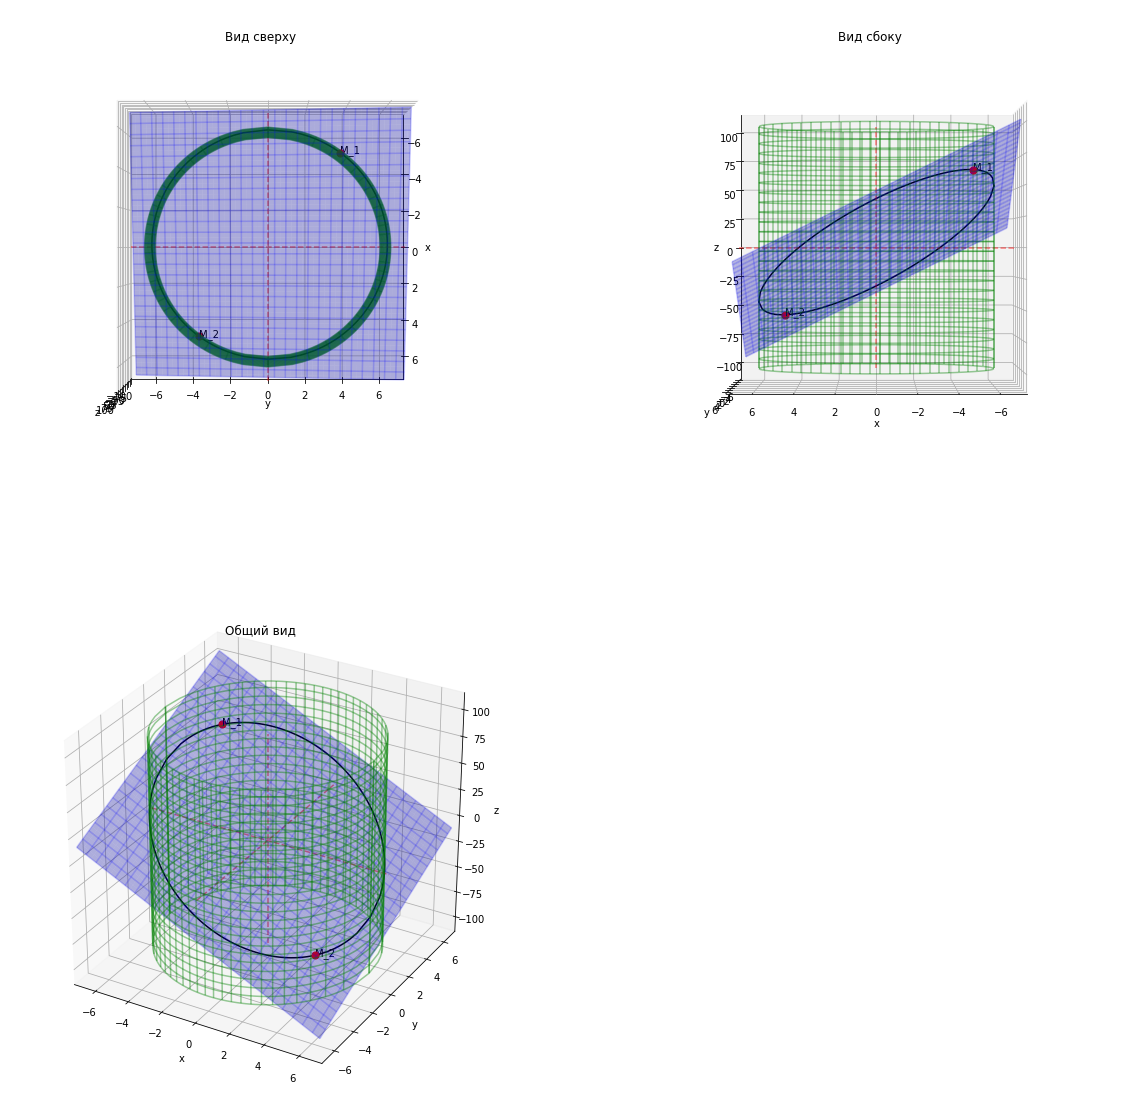

In [3]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(221, projection='3d')
plot_func(ax)
plot_condition(ax)
plot_contour(ax)
plot_additions(ax)
ax.view_init(90, 0)
ax.set_title('Вид сверху')

ax = fig.add_subplot(222, projection='3d')
plot_func(ax)
plot_condition(ax)
plot_contour(ax)
plot_additions(ax)
ax.view_init(0, 90)
ax.set_title('Вид сбоку')

ax = fig.add_subplot(223, projection='3d')
plot_func(ax)
plot_condition(ax)
plot_contour(ax)
plot_additions(ax)
ax.set_title('Общий вид')

plt.show()

**<font color='darkblue'>Ответ: $M_1(-\frac{5}{6},-\frac{24}{5},\frac{18}{5})$-точка условного максимума, $M_2(\frac{5}{6},\frac{24}{5},-\frac{18}{5})$-точка условного минимума</font>**

### 2. Задание
#### Исследовать функцию на условный экстремум:

$U=2x^2+12xy+32y^2+15$, если $x^2+16y^2=64$

**<font color='darkblue'>Решение:</font>**<br>
$f(x,y)=U=2x^2+12xy+32y^2+15$, $\phi(x,y)=x^2+16y^2-64$<br><br>
Составим функцию Лагранжа: $L(\lambda,x,y)=f(x,y)+\lambda\cdot\phi(x,y)$<br>
$L(\lambda,x,y)=2x^2+12xy+32y^2+15+\lambda\cdot(x^2+16y^2-64)$<br><br>
Решим систему уравнений:<br>
$\begin{cases}
   \frac{\partial L}{\partial x}=4x+12y+2x\lambda=0, 
   \\
   \frac{\partial L}{\partial y}=12x+64y+32y\lambda=0,
   \\
   \frac{\partial L}{\partial \lambda}=x^2+16y^2-64=0.
\end{cases}
\Rightarrow
\begin{cases}
   y=-\frac{x(\lambda+2)}{6}, 
   \\
   \frac{18x}{6}-\frac{16x(\lambda+2)}{6}-\frac{8\lambda x(\lambda+2)}{6}=0,
   \\
   x^2+16y^2=64.
\end{cases}
\Rightarrow
\begin{cases}
   y=-\frac{x(\lambda+2)}{6}, 
   \\
   -8\lambda^2x-32\lambda x-14x=0,
   \\
   x^2+16y^2=64.
\end{cases}
\Rightarrow
\begin{cases}
   y=-\frac{x(\lambda+2)}{6}, 
   \\
   x^2+16y^2=64,
   \\
    \left[ 
      \begin{gathered} 
          \lambda=-\frac{1}{2},\\
          \lambda=-\frac{7}{2} 
      \end{gathered} 
   \right.\\
\end{cases}
\Rightarrow
\left[ 
      \begin{gathered} 
          \begin{cases}
          \lambda=-\frac{1}{2},
          \\
           x=4\sqrt{2}, 
           \\
           y=-\sqrt{2};
       \end{cases}\\
       \begin{cases}
          \lambda=-\frac{1}{2},
          \\
           x=-4\sqrt{2}, 
           \\
           y=\sqrt{2};
       \end{cases}\\
       \begin{cases}
           \lambda=-\frac{7}{2},
           \\
           x=4\sqrt{2}, 
           \\
           y=\sqrt{2};
        \end{cases}\\
        \begin{cases}
           \lambda=-\frac{7}{2},
           \\
           x=-4\sqrt{2}, 
           \\
           y=-\sqrt{2}.
        \end{cases}
      \end{gathered} 
   \right.\\
$<br><br>
$\Rightarrow M_1(-\frac{1}{2},4\sqrt{2},-\sqrt{2}), M_2(-\frac{1}{2},-4\sqrt{2},\sqrt{2}),$<br>
$M_3(-\frac{7}{2},4\sqrt{2},\sqrt{2}), M_4(-\frac{7}{2},-4\sqrt{2},-\sqrt{2})$ - стационарные точки<br><br>
Выясним характер экстремумов:<br>
$\frac{\partial^2 L}{\partial x^2}=4+2\lambda$, $\frac{\partial^2 L}{\partial x \partial y}=12$, $\frac{\partial^2 L}{\partial y^2}=64+32\lambda$<br>
$d^2L=\frac{\partial^2 L}{\partial x^2}dx^2+2\frac{\partial^2 L}{\partial x \partial y}dxdy+\frac{\partial^2 L}{\partial y^2}dy^2=(4+2\lambda)dx^2+24dxdy+(64+32\lambda)dy^2$<br>
$\left.d^2L\right|_{M_1}=\left.d^2L\right|_{M_2}=(4-1)dx^2+24dxdy+(64-16)dy^2=3(dx+4dy)^2>0 \Rightarrow M_1(-\frac{1}{2},4\sqrt{2},-\sqrt{2}), M_2(-\frac{1}{2},-4\sqrt{2},\sqrt{2})$ - точки условного минимума<br>
$\left.d^2L\right|_{M_3}=\left.d^2L\right|_{M_4}=(4-7)dx^2+24dxdy+(64-7\cdot16)dy^2=-3(dx-4dy)^2<0 \Rightarrow M_3(-\frac{7}{2},4\sqrt{2},\sqrt{2}), M_4(-\frac{7}{2},-4\sqrt{2},-\sqrt{2})$ - точки условного максимума<br>

**<font color='darkblue'>Геометрическая интерпретация:</font>**<br>
Точки условного максимума и минимума - точки максимального и минимального значения функции в области пересечения значений функции и условия.<br><br>
На графиках ниже:<br>
1. Синяя поверхность - значения функции
2. Зеленый цилиндр - ограничивающие условия
3. Черная кривая - контур пересечения функции и условий
4. Красные точки - точки условного экстремума

In [4]:
# Возвращает значение функции в точках (x,y)
def get_func_2(x,y):
    return 2*x**2 + 12*x*y + 32*y**2 + 15

# Отрисовывает основную функцию // синяя поверхность
def plot_func(ax):
    x_p = np.linspace(-8, 8, 100) 
    y_p = np.linspace(-8, 8, 100)
    X_p, Y_p = np.meshgrid(x_p, y_p)
    Z_p = 2*X_p**2 + 12*X_p*Y_p + 32*Y_p**2 + 15
    ax.plot_surface(X_p, Y_p, Z_p, alpha=0.3, color='b', shade=True)
    ax.plot_wireframe(X_p, Y_p, Z_p, alpha=0.1, rstride=4, cstride=4, color='b')

# Отрисовывает условия на (x,y) // зеленый цилиндр
def plot_condition(ax):
    x_c = np.linspace(-8,8,100)
    z_c = np.linspace(0,1000,100)
    X_c, Z_c=np.meshgrid(x_c, z_c)
    Y_c = np.sqrt((64-X_c**2)/16)
    
    ax.plot_wireframe(X_c, Y_c, Z_c, alpha=0.4, rstride=4, cstride=4, color='g')
    ax.plot_wireframe(X_c, -Y_c, Z_c, alpha=0.4, rstride=4, cstride=4, color='g')

# Отрисовывает контур пересечения основной функции с условиями 
def plot_contour(ax):
    X_m = np.linspace(-8,8,100)
    Y_m = np.sqrt((64-X_m**2)/16)
    Z_m_1 = 2*X_m**2 + 12*X_m*Y_m + 32*Y_m**2 + 15
    Z_m_2 = 2*X_m**2 - 12*X_m*Y_m + 32*Y_m**2 + 15
    
    ax.plot(X_m, Y_m, Z_m_1,color='black')
    ax.plot(X_m, -Y_m, Z_m_2,color='black')

# Отрисовывает критические точки, оси координат, задает границы графика
def plot_additions(ax):
    # Отмечаем оси координат
    ax.plot((-8,8), (0,0), (0,0), alpha=0.5, c='r', linestyle='--')
    ax.plot((0,0), (-8,8), (0,0), alpha=0.5, c='r', linestyle='--')
    ax.plot((0,0), (0,0), (10,1000), alpha=0.5, c='r', linestyle='--')

    # Отмечаем критические точки 
    ax.scatter(4*2**(0.5),-2**(0.5),get_func_2(4*2**(0.5),-2**(0.5)),'z',50,'red')
    ax.text(4*2**(0.5),-2**(0.5),get_func_2(4*2**(0.5),-2**(0.5)),'M_1')
    ax.scatter(-4*2**(0.5),2**(0.5),get_func_2(-4*2**(0.5),2**(0.5)),'z',50,'red')
    ax.text(-4*2**(0.5),2**(0.5),get_func_2(-4*2**(0.5),2**(0.5)),'M_2')
    ax.scatter(4*2**(0.5),2**(0.5),get_func_2(4*2**(0.5),2**(0.5)),'z',50,'red')
    ax.text(4*2**(0.5),2**(0.5),get_func_2(4*2**(0.5),2**(0.5)),'M_3')
    ax.scatter(-4*2**(0.5),-2**(0.5),get_func_2(-4*2**(0.5),-2**(0.5)),'z',50,'red')
    ax.text(-4*2**(0.5),-2**(0.5),get_func_2(-4*2**(0.5),-2**(0.5)),'M_4')

    # Границы графика
    ax.set_xlim((-10,10))
    ax.set_ylim((-10,10))
    ax.set_zlim((10,1000))

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

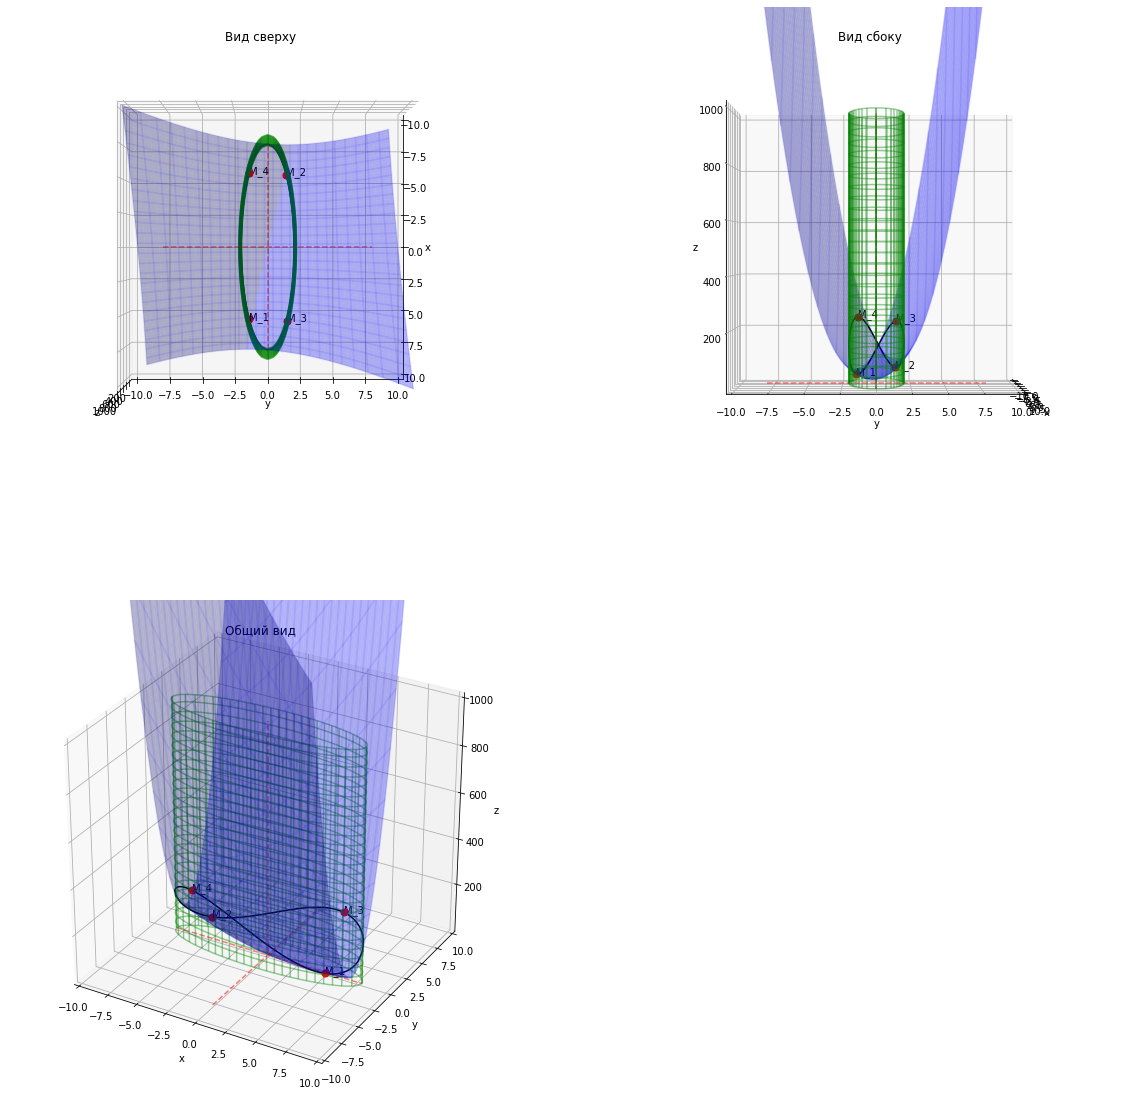

In [5]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(221, projection='3d')
plot_func(ax)
plot_condition(ax)
plot_contour(ax)
plot_additions(ax)
ax.view_init(90, 0)
ax.set_title('Вид сверху')

ax = fig.add_subplot(222, projection='3d')
plot_func(ax)
plot_condition(ax)
plot_contour(ax)
plot_additions(ax)
ax.view_init(0, 0)
ax.set_title('Вид сбоку')

ax = fig.add_subplot(223, projection='3d')
plot_func(ax)
plot_condition(ax)
plot_contour(ax)
plot_additions(ax)
ax.set_title('Общий вид')

plt.show()

**<font color='darkblue'>Ответ: $M_1(-\frac{1}{2},4\sqrt{2},-\sqrt{2}), M_2(-\frac{1}{2},-4\sqrt{2},\sqrt{2})$ - точки условного минимума, $M_3(-\frac{7}{2},4\sqrt{2},\sqrt{2}), M_4(-\frac{7}{2},-4\sqrt{2},-\sqrt{2})$ - точки условного максимума</font>**

### 3. Задание
#### Найти производную функции $U=x^2+y^2+z^2$ по направлению вектора $\overrightarrow{с}(-9,8,-12)$ в точку $M(8,-12,9)$

**<font color='darkblue'>Решение:</font>**<br>
Найдем частные производные в точке $M(8,-12,9)$:<br>
$\frac{\partial U}{\partial x}=2x \Rightarrow$ 
$\left.\frac{\partial U}{\partial x}\right|_{(8,-12,9)}=16$<br><br>
$\frac{\partial U}{\partial y}=2y \Rightarrow$
$\left.\frac{\partial U}{\partial y}\right|_{(8,-12,9)}=-24$<br><br>
$\frac{\partial U}{\partial z}=2z \Rightarrow$
$\left.\frac{\partial U}{\partial z}\right|_{(8,-12,9)}=18$<br><br>
Найдем координаты направляющего вектора единичной длины:<br>
$|\overrightarrow{с}|=\sqrt{(-9)^2+8^2+(-12)^2}=\sqrt{81+64+144}=\sqrt{289}=17$<br>
$\overrightarrow{с_0}=(-\frac{9}{17},\frac{8}{17},-\frac{12}{17})\Rightarrow
\cos{\alpha}=-\frac{9}{17},\cos{\beta}=\frac{8}{17},\cos{\gamma}=-\frac{12}{17}$<br><br>
$\frac{\partial U}{\partial \overrightarrow{с}}=\frac{\partial U}{\partial x}\cos{\alpha}+\frac{\partial U}{\partial y}\cos{\beta}+\frac{\partial U}{\partial z}\cos{\gamma}$<br><br>
$\left.\frac{\partial U}{\partial \overrightarrow{с}}\right|_{M(8,-12,9)}=16 \cdot (-\frac{9}{17})+(-24) \cdot \frac{8}{17} + 18 \cdot (-\frac{12}{17})=\frac{-144-192-216}{17}=-\frac{552}{17}<0 \Rightarrow$ функция $U$ по направлению вектора $\overrightarrow{с}$ в точке $M(8,-12,9)$ убывает.

**<font color='darkblue'>Ответ: $-\frac{552}{17}$</font>**

### 4. Задание
#### Найти производную функции $U=e^{x^2+y^2+z^2}$ по направлению вектора $\overrightarrow{d}(4,-13,-16)$ в точку $L(-16,4,-13)$

**<font color='darkblue'>Решение:</font>**<br>
Найдем частные производные в точке $L(-16,4,-13)$:<br>
$\frac{\partial U}{\partial x}=2xe^{x^2+y^2+z^2} \Rightarrow$ 
$\left.\frac{\partial U}{\partial x}\right|_{(-16,4,-13)}=-32e^{441}$<br><br>
$\frac{\partial U}{\partial y}=2ye^{x^2+y^2+z^2} \Rightarrow$ 
$\left.\frac{\partial U}{\partial y}\right|_{(-16,4,-13)}=8e^{441}$<br><br>
$\frac{\partial U}{\partial z}=2ze^{x^2+y^2+z^2} \Rightarrow$ 
$\left.\frac{\partial U}{\partial z}\right|_{(-16,4,-13)}=-26e^{441}$<br><br>
Найдем координаты направляющего вектора единичной длины:<br>
$|\overrightarrow{d}|=\sqrt{4^2+(-13)^2+(-16)^2}=\sqrt{16+169+256}=\sqrt{441}=21$<br>
$\overrightarrow{d_0}=(\frac{4}{21},-\frac{13}{21},-\frac{16}{21})\Rightarrow
\cos{\alpha}=\frac{4}{21},\cos{\beta}=-\frac{13}{21},\cos{\gamma}=-\frac{16}{21}$<br><br>
$\frac{\partial U}{\partial \overrightarrow{d}}=\frac{\partial U}{\partial x}\cos{\alpha}+\frac{\partial U}{\partial y}\cos{\beta}+\frac{\partial U}{\partial z}\cos{\gamma}$<br><br>
$\left.\frac{\partial U}{\partial \overrightarrow{d}}\right|_{L(-16,4,-13)}=-32e^{441} \cdot \frac{4}{21} + 8e^{441}\cdot (-\frac{13}{21}) + (-26e^{441})\cdot (-\frac{16}{21})=\frac{}{21}=-\frac{-128e^{441}-104e^{441}+416e^{441}}{21}=\frac{184e^{441}}{21}>0 \Rightarrow$ функция $U$ по направлению вектора $\overrightarrow{d}$ в точке $L(-16,4,-13)$ возрастает.

**<font color='darkblue'>Ответ: $\frac{184e^{441}}{21}$</font>**